When I was a little girl I dreamed of Spotify Wrapped on Apple Music. Why not switch to Spotify then? My dad pays for Apple Music so it's not up for consideration. Then Apple Music released it's own wrapped. Apple Music Replay. Updated EVERY WEEK. But is was not enough for me. It's never enough.

That's why I decided to start this project. To analize every possible thing any human being ever could.

And everyone can do it. All you need is an exam period, too much free time and your friend ghosting you (please text me back, I really miss you). Request your data from Apple Music and you can start.

Let's start with all libraries.

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Let's take a look at the data.

In [3]:
df = pd.read_csv('Apple Music - Play History Daily Tracks.csv')

In [4]:
df

,Country,Track Identifier,Media type,Date Played,Hours,Play Duration Milliseconds,End Reason Type,Source Type,Play Count,Skip Count,Ignore For Recommendations,Track Reference,Track Description
0,Poland,347700346,AUDIO,20190818,"15, 17",460636,NATURAL_END_OF_TRACK,IPHONE,2,0,False,3.477003e+08,Marina and The Diamonds - Hollywood
1,Poland,347700348,AUDIO,20190818,"15, 17",431890,NATURAL_END_OF_TRACK,IPHONE,2,0,False,3.477003e+08,Marina and The Diamonds - Hermit the Frog
2,Poland,347700343,AUDIO,20190818,"15, 17",417586,NATURAL_END_OF_TRACK,IPHONE,2,0,False,3.477003e+08,Marina and The Diamonds - Girls
3,Poland,347700345,AUDIO,20190818,"15, 17",416380,NATURAL_END_OF_TRACK,IPHONE,3,0,False,3.477003e+08,Marina and The Diamonds - Obsessions
4,Poland,347700342,AUDIO,20190818,"15, 17",406896,NATURAL_END_OF_TRACK,IPHONE,2,0,False,3.477003e+08,Marina and The Diamonds - I Am Not a Robot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44017,Poland,1468058173,AUDIO,20231128,14,221300,NATURAL_END_OF_TRACK,IPHONE,1,0,False,1.468058e+09,Taylor Swift - Lover
44018,Poland,1639195757,AUDIO,20231128,13,216905,NATURAL_END_OF_TRACK,IPHONE,1,0,False,1.639196e+09,Ralph Kaminski - Duchy
44019,Poland,1211892553,AUDIO,20231128,13,205853,NATURAL_END_OF_TRACK,IPHONE,1,0,False,1.211893e+09,Alexandra Savior - Mirage
44020,Poland,1564531204,AUDIO,20231128,12,194887,NATURAL_END_OF_TRACK,IPHONE,1,0,False,1.564531e+09,Billie Eilish - Male Fantasy


I'm too lazy to change it in Python so I did it in Excel. Now it'll look like this:

In [5]:
df = pd.read_csv('AppleMusicCSV.csv', sep=';')

In [6]:
df

,Year,Month,Day,Artist,Song,Seconds
0,2019,8,18,Marina and The Diamonds,Hollywood,460.636
1,2019,8,18,Marina and The Diamonds,Hermit the Frog,431.890
2,2019,8,18,Marina and The Diamonds,Girls,417.586
3,2019,8,18,Marina and The Diamonds,Obsessions,416.380
4,2019,8,18,Marina and The Diamonds,I Am Not a Robot,406.896
...,...,...,...,...,...,...
44017,2023,11,28,Taylor Swift,Lover,221.300
44018,2023,11,28,Ralph Kaminski,Duchy,216.905
44019,2023,11,28,Alexandra Savior,Mirage,205.853
44020,2023,11,28,Billie Eilish,Male Fantasy,194.887


Now it'll add things I was too lazy to add in Excel.

In [7]:
df['Minutes'] = df['Seconds']/60

df['Hours'] = df['Minutes']/60

df.drop(columns='Seconds', inplace=True)

In [8]:
df

,Year,Month,Day,Artist,Song,Minutes,Hours
0,2019,8,18,Marina and The Diamonds,Hollywood,7.677267,0.127954
1,2019,8,18,Marina and The Diamonds,Hermit the Frog,7.198167,0.119969
2,2019,8,18,Marina and The Diamonds,Girls,6.959767,0.115996
3,2019,8,18,Marina and The Diamonds,Obsessions,6.939667,0.115661
4,2019,8,18,Marina and The Diamonds,I Am Not a Robot,6.781600,0.113027
...,...,...,...,...,...,...,...
44017,2023,11,28,Taylor Swift,Lover,3.688333,0.061472
44018,2023,11,28,Ralph Kaminski,Duchy,3.615083,0.060251
44019,2023,11,28,Alexandra Savior,Mirage,3.430883,0.057181
44020,2023,11,28,Billie Eilish,Male Fantasy,3.248117,0.054135


Let's take a look at the artists:

In [9]:
df['Artist'].nunique()

1270

In [10]:
df['Artist'].count()

44022

It seems like I listen to the same artists almost all the time. Let's find out who they are.

In [16]:
top_artists = df.groupby(['Artist'])[['Hours']].sum().sort_values(by='Hours', ascending=False)

In [17]:
top_artists.head(10)

,Hours
Artist,
Lana Del Rey,645.020495
Arctic Monkeys,265.281923
Taylor Swift,229.251899
KARAŚ/ROGUCKI,154.104911
Mitski,129.787053
Ralph Kaminski,125.630772
Billie Eilish,90.571564
David Bowie,83.913492
Myslovitz,82.380697


<Axes: ylabel='Artist'>

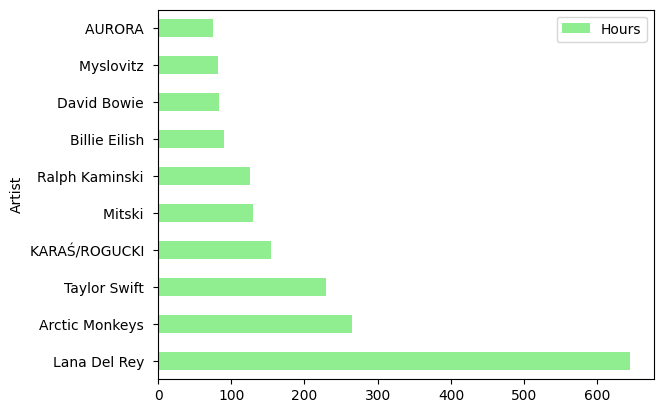

In [22]:
top_artists.iloc[:10].plot(kind='barh', color='Lightgreen')

Over 600 hours seems like something I would do. Now let's take a look at the songs.

In [24]:
top_songs = df.groupby(['Song'])[['Hours']].sum().sort_values(by='Hours', ascending=False)

<Axes: ylabel='Song'>

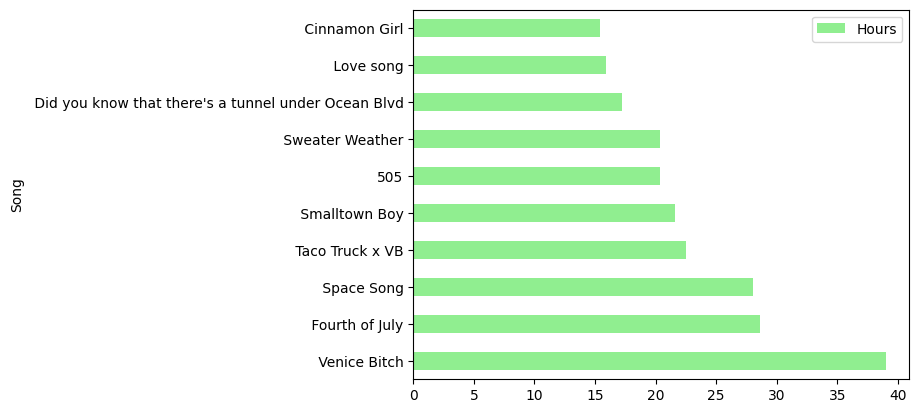

In [25]:
top_songs.iloc[:10].plot(kind='barh', color='Lightgreen')

I don't exactly know if I'm proud of myself. Let's see who was my favorite artist during every week from August 2019 to November 2023. I would like to apologize for the implementation of week numbers. I don't know any better. This is my first project. Two days ago I didn't know who Panda is.

In [27]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Week Number'] = df['Date'].dt.isocalendar().week

df.loc[df['Year'] == 2020, 'Week Number'] += 52
df.loc[df['Year'] == 2021, 'Week Number'] += 104
df.loc[df['Year'] == 2022, 'Week Number'] += 156
df.loc[df['Year'] == 2023, 'Week Number'] += 208

In [28]:
df['Minutes per Week'] = df.groupby(['Artist', 'Year', 'Week Number'])[['Minutes']].transform('sum')

df['Max minutes'] = df.groupby(['Week Number'])[['Minutes per Week']].transform('max')

fav_artist_in_week = df.loc[df['Minutes per Week'] == df['Max minutes']][['Week Number', 'Artist', 'Minutes per Week']].drop_duplicates()

In [29]:
fav_artist_in_week

,Week Number,Artist,Minutes per Week
0,33,Marina and The Diamonds,85.786567
16,34,Marina and The Diamonds,231.879617
103,35,Marina and The Diamonds,432.723283
266,36,Lana Del Rey,415.427767
462,37,Lana Del Rey,466.780650
...,...,...,...
42955,252,Taylor Swift,327.904283
43259,253,Lana Del Rey,157.262617
43461,254,Daria Zawiałow,301.320467
43721,255,The Dumplings,333.145867


Now let's see how many of them were unique.

In [31]:
fav_artist_in_week['Artist'].nunique()

52

More than I expected. Now let's see how they vary.

In [34]:
fav_artist_in_week['Artist'].value_counts()

Artist
Lana Del Rey                                                                                                                              68
Arctic Monkeys                                                                                                                            21
Taylor Swift                                                                                                                              17
KARAŚ/ROGUCKI                                                                                                                             13
Ralph Kaminski                                                                                                                             9
Billie Eilish                                                                                                                              8
Myslovitz                                                                                                                                  7
The Du

68 weeks of Lana Del Rey don't suprise me, however I would like to pay your attentions to the weeks I listened mostly to Todrick Hall or 4 weeks of different combinations of the 'Hamilton' Cast.

In [38]:
import seaborn as sns

I can't really do anything with seaborn but I wanted to try. I'd like to make a scatter plot with the Date and Minutes listened per week so that every Artist has it's own color and it looks pretty.

Now let's take a look at the history of my favorite artists.

In [60]:
df['Cumsum of Minutes'] = df.groupby(['Artist'])[['Minutes']].cumsum()
df['Minutes per Week'] = df.groupby(['Artist', 'Year', 'Week Number'])[['Minutes']].transform('sum')

top_artists = df.groupby(['Artist'])[['Minutes', 'Hours']].sum().sort_values(by='Minutes', ascending=False)

dates_with_fav_artists = df.loc[df['Artist'].isin(top_artists.iloc[:5].index)][['Artist', 'Year', 'Week Number',
                                                                                'Minutes per Week']]


dates_with_fav_artists = dates_with_fav_artists.drop_duplicates().sort_values(by=['Artist', 'Year', 'Week Number'])

I apologize, I can't do it better.

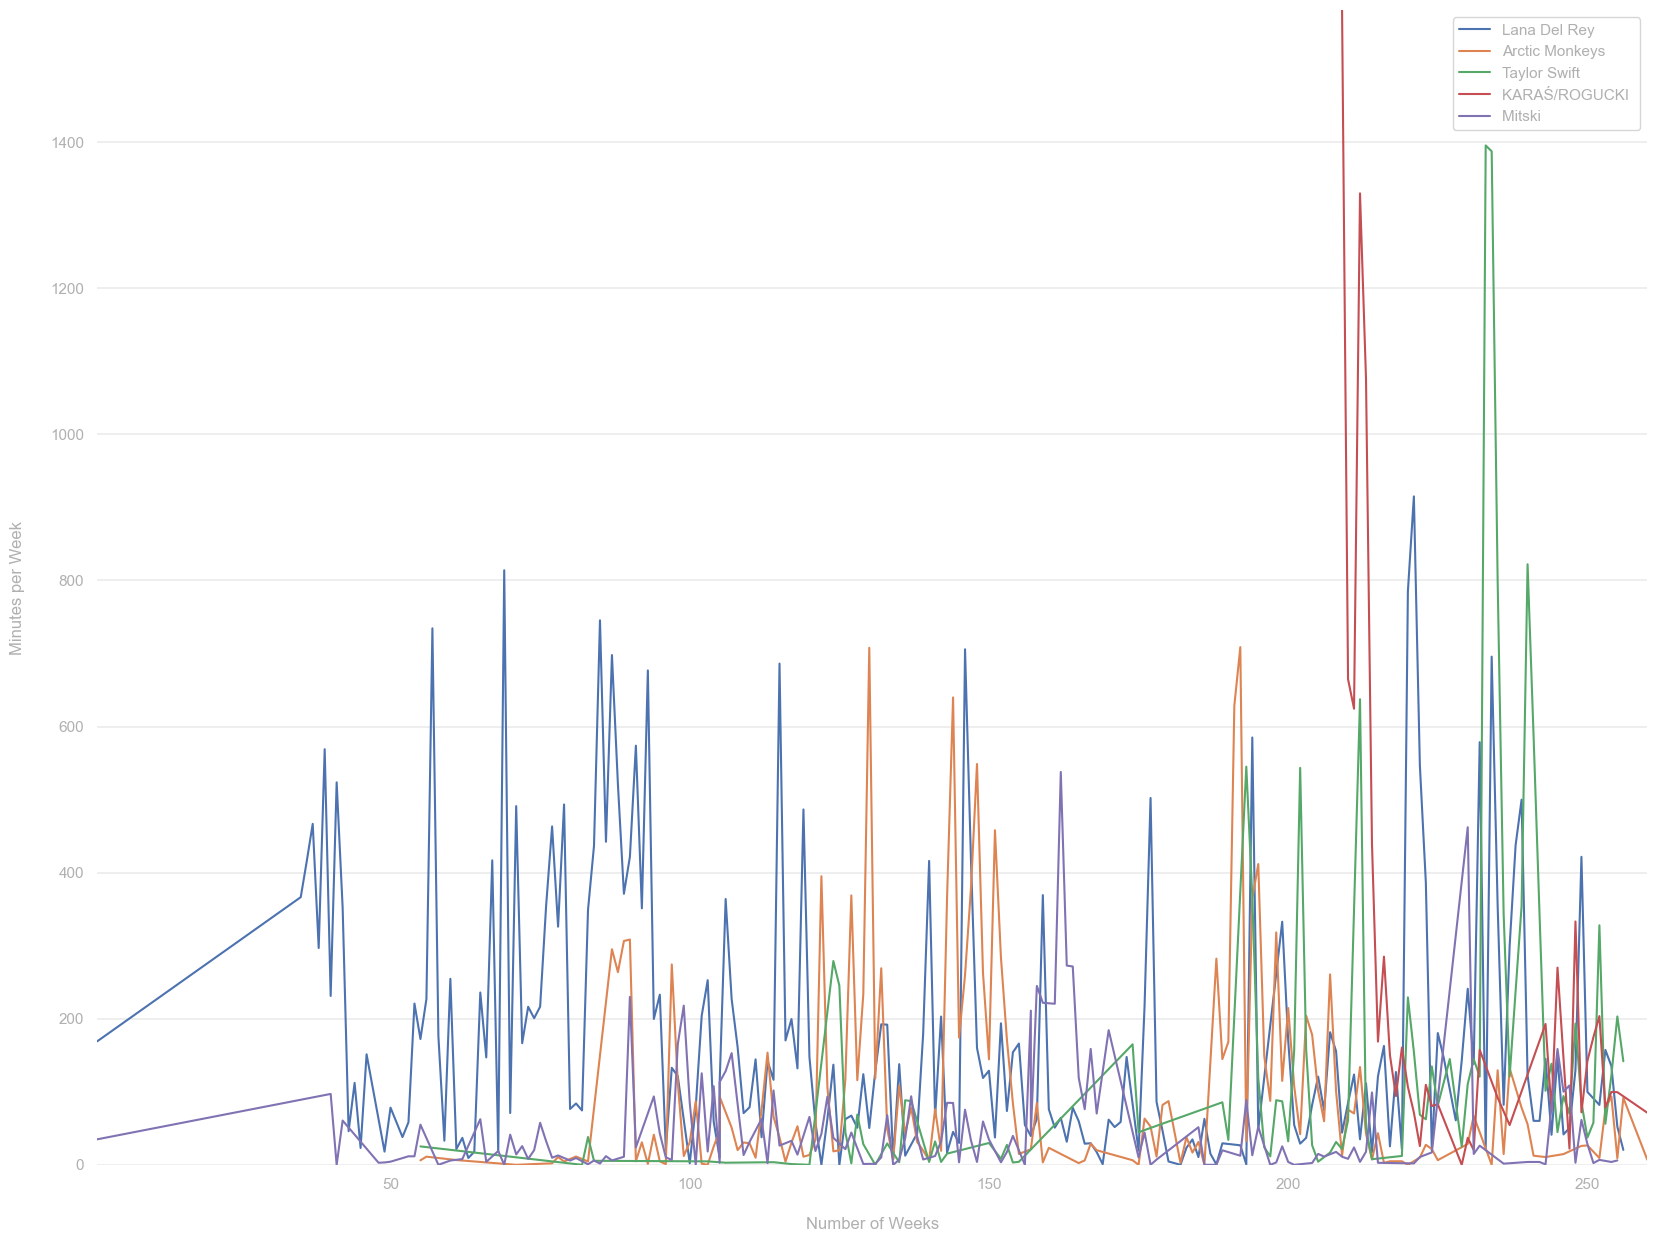

In [62]:
import matplotx as matplotx

artist_x = {}
artist_y = {}

for artist in top_artists.iloc[:5].index:
    week = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Week Number'].to_numpy()
    year = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Year'].to_numpy()
    minutes = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Minutes per Week'].to_numpy()

    artist_x.update({artist: week})
    artist_y.update({artist: minutes})

plt.figure(figsize=(20, 15))

plt.style.use(matplotx.styles.dufte)

for artist in top_artists.iloc[:5].index:
    x = artist_x.get(artist)
    y = artist_y.get(artist)

    plt.plot(x, y, label=artist)

plt.xlabel("Number of Weeks")
plt.ylabel("Minutes per Week")
plt.legend()
plt.show()

You can't see much but love the KARAŚ/ROGUCKI peak. Let's see next 5 artists.

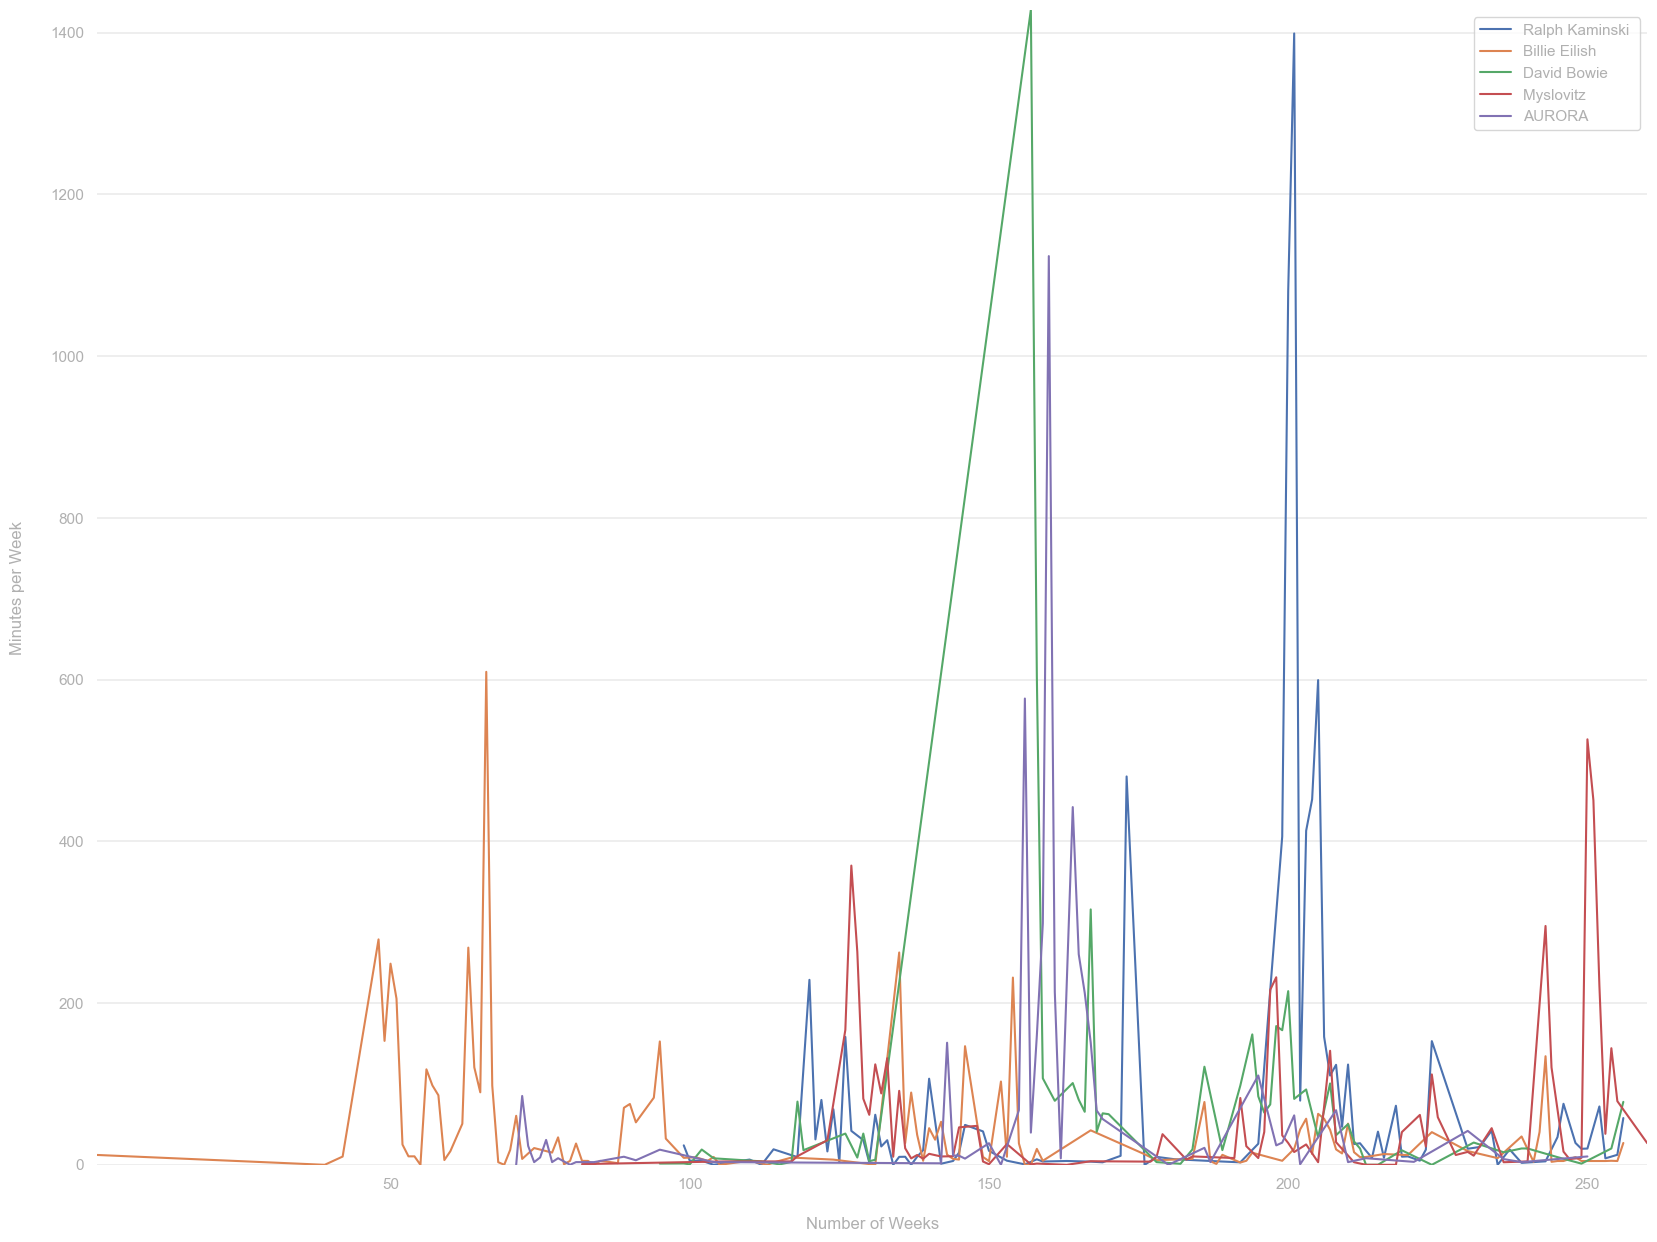

In [63]:
dates_with_fav_artists = df.loc[df['Artist'].isin(top_artists.iloc[5:10].index)][['Artist', 'Year', 'Week Number',
                                                                                'Minutes per Week']]


dates_with_fav_artists = dates_with_fav_artists.drop_duplicates().sort_values(by=['Artist', 'Year', 'Week Number'])

artist_x = {}
artist_y = {}

for artist in top_artists.iloc[5:10].index:
    week = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Week Number'].to_numpy()
    year = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Year'].to_numpy()
    minutes = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Minutes per Week'].to_numpy()

    artist_x.update({artist: week})
    artist_y.update({artist: minutes})

plt.figure(figsize=(20, 15))

plt.style.use(matplotx.styles.dufte)

for artist in top_artists.iloc[5:10].index:
    x = artist_x.get(artist)
    y = artist_y.get(artist)

    plt.plot(x, y, label=artist)

plt.xlabel("Number of Weeks")
plt.ylabel("Minutes per Week")
plt.legend()
plt.show()

Again whatever happened to David Bowie and Ralph Kamiński.

It's over for today. My goal for tomorrow is to make the cake diagram or a scatter diagram. Some more using sns with waves like in spotify wrapped. Analize day by day my university time. Maybe somehow use clustering to find intense periods of listening to one artist. 